# Week 8: Parameter Estimation

In [63]:
# Loading the libraries
import numpy as np
#import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import scipy.optimize as opt
from scipy.integrate import quad

## Day 3: Bayesian Parameter Estimation

We have already used the Maximum Likelihood method to estimate the value of a distribution parameter. To do this, we made an assumption about the shape of the distribution and obtained some data. One thing we did not do is make any assumptions about the parameters themselves. In other words, we were ignorant about the possible range of values that the parameter might *prefer* (except for explicit mathematical limitations).

The Bayesian Parameter Estimation is a process which, as the name suggests, uses the Bayes' theorem to estimate parameters. However, unlike the maximum likelihood approach, now we have to make an assumption about what is the **distribution of the parameter** we estimate, before we even start the estimation. The goal is to combine this information with the data to obtain a new distribution for the values of the parameter *after* we have obtained the data.

## How does it work?
Let $X$ be a random variable with parameter $\theta \in \Theta$ where $\Theta$ is the set of possible values for $\theta$.

First, we assume that $\theta$ has a certain **prior** distribution in $\Theta$. Let's denote it by $p_\Theta (\theta)$

Next, collect some data for $X$. Since $\theta$ is a parameter of this random variable, the **likelihood** that $X=x$ is given through the density we denote as $p_{X\mid\Theta} (x \mid \theta)$

Now comes the key part: how do we incorporate the information from the prior about $\theta$ and the likelihood about $x$ in order to gain a better understanding about the values of $\theta$? In simple words: how does **evidence** (the data, $x$s) influence our understanding of the **assumption** (about $\theta$ given through the prior)?

In a nutshell, the answer lies in the Bayes' theorem. The phrase *evidence influences assumption/prior* is nothing else but the density $p_{\Theta \mid X} (\theta \mid x)$, which is called **posterior** distribution of the values of the parameter $\theta$, after some evidence has been collected through the value(s) $x$. Mathematically, the prior, the likelihood and the posterior are related as:
$$
p_{\Theta \mid X} \left( \theta \mid x \right) = \frac{p_{X \mid \Theta} \left( x \mid \theta \right) \cdot p_\Theta (\theta) }{p_X (x)}
$$
The denominator $p_X (x)$, which in practice may be computationally intensive to calculate, is given by:
* If $\theta$ is a continuous random variable
$$
p_X(x) = \int_{\theta_\min}^{\theta_\max} {p_{X \mid \Theta} \left( x \mid \theta \right) \cdot p_\Theta (\theta)}\, d\theta
$$
* If $\theta$ is a discrete random variable
$$
p_X(x) = \sum_{\text{all } \theta} {p_{X \mid \Theta} \left( x \mid \theta \right) \cdot p_\Theta (\theta)}
$$

Once we construct the posterior distribution we can also construct a point-estimate of the value of the parameter called **Maximum A Posteriori** or **MAP** estimate as the mean of the posterior.

## Example 1
It is believed that cross-fertilized plants produce taller offspring than the self-fertilized plants. In order to obtain an estimate on the proportion $\theta$ of cross-fertilized plants that are taller, a researcher observes a random sample of $n=15$ pairs of plants that are exactly the same age. Each pair is grown in the same conditions with some cross-fertilized and the others self-fertilized.

Based on previous experience, the experimenter believes that the following are possible values of $\theta$ and that the prior distribution for each value of $\theta$ given by is $p_\Theta (\theta)$

| $\theta$            | 0.80 | 0.82 | 0.84 | 0.86 | 0.88 | 0.90 |
|--------------------:|------|------|------|------|------|------|
| $p_\Theta (\theta)$ | 0.08 | 0.17 | 0.25 | 0.25 | 0.17 | 0.08 |

From the experiment, it is observed that in 13 of the 15 pairs, cross-fertilized is taller. Find the posterior distribution of $\theta$.

,theta,prior,lik,lik*prior,post
0,0.80,0.166667,0.003455,0.000576,0.530492
1,0.82,0.166667,0.001768,0.000295,0.271447
2,0.84,0.166667,0.000816,0.000136,0.125234
3,0.86,0.166667,0.000330,0.000055,0.050737
4,0.88,0.166667,0.000113,0.000019,0.017364
5,0.90,0.166667,0.000031,0.000005,0.004726


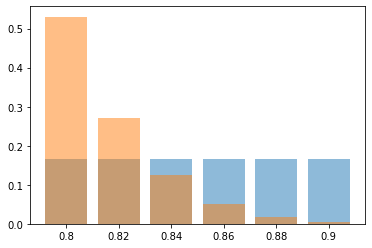

In [64]:
# Given stuff:
t = np.array([0.80, 0.82, 0.84, 0.86, 0.88, 0.90])
#p_t = np.array([0.08, 0.17, 0.25, 0.25, 0.17, 0.08])
p_t = np.ones(6)/6
n = 15
k = 7

# X - number of cross-fertilized plans that are taller in a group of 15
# X ~ B(n, theta)

# Build the dataframe
df = pd.DataFrame(columns=['theta', 'prior', 'lik', 'lik*prior', 'post'])
df['theta'] = t
df['prior'] = p_t
df['lik'] = stats.binom(n=15, p=t).pmf(k)
df['lik*prior'] = df['lik'] * df['prior']
df['post'] = df['lik*prior'] / df['lik*prior'].sum()

display(df)


#Visulaize the prior and the posterior
ticks = [str(t) for t in df['theta']]
plt.figure()
plt.bar(data=df, x=ticks, height='prior', label='Prior', alpha=0.5)
plt.bar(data=df, x=ticks, height='post' , label='Posterior', alpha=0.5)
#plt.legend()
plt.show()

In [65]:
# MAP = E(posterior) = sum(theta * posteriror(theta))
map_est = np.sum(df['theta'] * df['post'])
np.round(map_est, 2)

0.82

In [66]:
#calculate the prior and the posterior mean
prior_mean = ...
post_mean = ...

print('Prior mean = ', prior_mean)
print('Posterior mean = ', post_mean)

Prior mean =  Ellipsis
Posterior mean =  Ellipsis


## Example 2
A certain random process produces outcomes according to a Poisson distribution. If $X$ is the random variable that models the outcomes, then $X \sim Po(\lambda)$. The value of the parameter $\lambda$ is thought to be uniformly distributed in the interval $(0, 5]$.
* Upon observation, we obtain an outcome $X = 4$. Construct the posterior distribution for the outcomes.
* Then a second observation is made, $X = 2$. Find the posterior after the two observations

In [67]:
# prior is lambda ~ U(0, 5]), likelihood is X ~ Po(lambda)
def prior(x):
    return stats.uniform(0, 5).pdf(x)

# posterior is likelihood * prior
def posterior(lmbd, data):
    numerator = lambda x, data: stats.poisson(x).pmf(data) * prior(x)
    denominator = quad(numerator, 0, 5, args=(data))[0]
    return numerator(lmbd, data) / denominator


# faster posterior
numerator = lambda x, data: np.prod(stats.poisson(x).pmf(data)) * prior(x)
denominator = quad(numerator, 0, 5, args=(4))[0]
def posterior(lmbd, data):
    return numerator(lmbd, data) / denominator

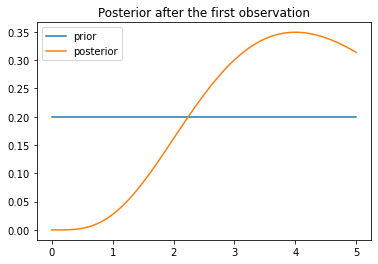

In [68]:
# Visualize the prior and the posterior to see how things have changed
xs = np.linspace(0, 5, 100)
ys = np.array([ prior(x) for x in xs ]) # prior
zs = np.array([ posterior(x, 4) for x in xs ]) # posterior

plt.figure()
plt.title('Posterior after the first observation')
plt.plot(xs, ys, label='prior')
plt.plot(xs, zs, label='posterior')
plt.legend()
plt.show()

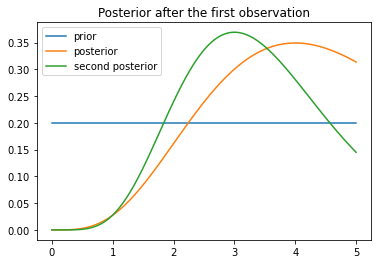

In [69]:
# Two observations
obs = np.array([4, 2])

# faster posterior
numerator = lambda x, data: np.prod(stats.poisson(x).pmf(data)) * prior(x)
denominator = quad(numerator, 0, 5, args=(obs))[0]
def posterior(lmbd, data):
    return numerator(lmbd, data) / denominator

# The posterior now is: posterior(x, obs)
ws = np.array([ posterior(x, obs) for x in xs ]) # posterior

plt.figure()
plt.title('Posterior after the first observation')
plt.plot(xs, ys, label='prior')
plt.plot(xs, zs, label='posterior')
plt.plot(xs, ws, label='second posterior')
plt.legend()
plt.show()

## Example 2a
For the second posterior you constructed in **Example 2**, find the maximum a posteriori estimate (**MAP**) $\hat\lambda$ of the parameter $\lambda$, and construct a 95% confidence interval for it based on the posterior distribution.

**Note:** the MAP is the mean/expected value of the posterior distribution for $\lambda$

In [70]:
# Getting the mean of the posterior
def MAP(x, data):
    return x * posterior(x, data)

lmbd_hat = quad(MAP, 0, 5, args=(obs))[0]

print('MAP = ', lmbd_hat)

MAP =  3.1375533936365727


In [44]:
# Constructing the interval
accum = np.array([ quad(posterior, 0, x, args=(obs))[0] for x in xs ])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], dtype=int64),)

95% CI = (1.3636363636363635, 4.848484848484849)


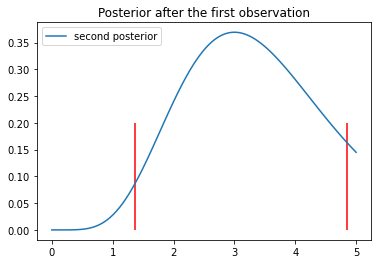

In [51]:
lower_index = np.max(np.where(accum <= 0.025))
upper_index = np.min(np.where(accum >= 0.975))

l = xs[lower_index]
u = xs[upper_index]

print(f'95% CI = ({l}, {u})')

plt.figure()
plt.title('Posterior after the first observation')
plt.plot(xs, ws, label='second posterior')
plt.vlines([l, u], 0, 0.2, colors='r')
plt.legend()
plt.show()

## Example 3:
In a study done at the *National Institute of Science and Technology* in 1980, asbestos fibers on filters were counted as part of a project to develop measurement standards for asbestos concentration. Asbestos dissolved in water was spread on a filter, and 3-mm diameter punches were taken from the filter and mounted on a transmission electron microscope. An operator counted the number of fibers in each of 23 grid squares; the results are given in the cell below.

Let $X$ be the random variable that counts how many fibers there are in one grid square. Then $X \sim Po(\lambda)$ where $\lambda$ represents the mean number of fibers per square. Assuming that the prior distribution of $\lambda$ is a **Gamma distribution** with parameters $\alpha = 15$ and $\theta = 1.2$, construct the posterior distribution for $\lambda$ given the observed experimental data. Find the MAP estimate $\hat\lambda$ for $\lambda$.

In [53]:
# The asbestos counts
asbestos = np.array([31, 29, 19, 18, 31, 28,
                    34, 27, 34, 30, 16, 18,
                    26, 27, 27, 18, 24, 22,
                    28, 24, 21, 17, 24])

#constructing the prior
alpha = 15.0
theta = 1.2

def prior(x, alpha, theta):
    return stats.gamma(alpha, theta).pdf(x)

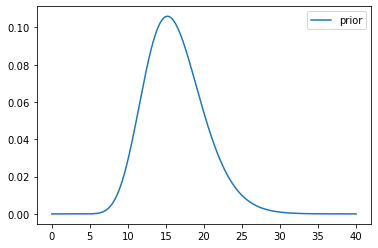

In [56]:
# visualize the prior, just for fun
xs = np.linspace(0, 40, 500)
ys = np.array([ prior(x, alpha, theta) for x in xs ])

plt.figure()
plt.plot(xs, ys, label='prior')
plt.legend()
plt.show()

In [58]:
# Constructing the posterior
numerator = lambda x, data: np.prod(stats.poisson(x).pmf(data)) * prior(x, alpha, theta)
denominator = quad(numerator, 0, 40, args=(asbestos))[0]

def posterior(lmbd, data):
    return numerator(lmbd, data) / denominator

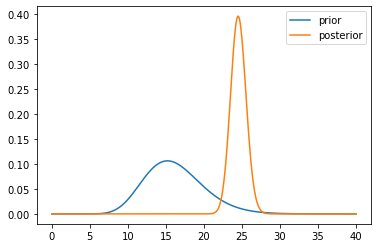

In [59]:
#plot both prior and posterior
zs = np.array([posterior(x, asbestos) for x in xs])

plt.figure()
plt.plot(xs, ys, label='prior')
plt.plot(xs, zs, label='posterior')
plt.legend()
plt.show()

In [62]:
# Getting the mean of the posterior
def MAP(x, data):
    return x * posterior(x, data)

map_est = quad(MAP, 0, 40, args=(asbestos))[0]

print('MAP = ', map_est)

MAP =  24.530652255840707


In [ ]:
# constructing the interval
